In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast
from wordcloud import WordCloud, STOPWORDS

# Background

Data science and analytics-related jobs are booming in the market. As companies have started their journey to be data-driven, they invest more on human capital on analytic efforts. However, how they determine their needs for analytical roles is still varied even for each company. Roles with the very same name can require different experience on some specific fields. There is no certain agreement on how should companies define the responsibilities of a certain role. Some questions may emerge from the job hunter out there on what kind technical skills and proficiencies they actually need to have, or at least start to learn, to be able to enter the data-related job market. 

In this analysis, we'd like explore how varied the responsibilities given and skills required for applying some data-related jobs. 

Main points that will be covered:
1. Data-related roles available in the market
2. Industries that need data-related role
3. Minimum company size to embrace data-related role
4. Contract type
5. Top skills required for each role type
6. Role and skills required mismatch

# Limitations

Roles considered:
- Data Analyst
- Data Scientist
- Data Engineer
- Business Intelligence

In [2]:
df_jobs = pd.read_csv('jobs.csv')
df_jobs.head()

,URL,Title,Company,Industry,Size,Posted at,Location,Job Type,Experience Required,Responsibilities,Requirements,Skills Required,Raw Details,Scraped at
0,https://www.techinasia.com/jobs/5ae5dd38-934c-...,Data Analyst,Cicil,"Lending, loans, and credit",51 – 200,Date created: 9 Nov 2021,"Jakarta, Indonesia",Full-time,1 to 4 years,"['Business Analyst - ORAMI SIRCLOTangerang, In...","['Business Analyst - ORAMI SIRCLOTangerang, In...","['Python', 'SQL', 'R']","<div class=""jsx-3475296548""><ul><li>Analyze da...",2021-11-10 13:46:57.061589
1,https://www.techinasia.com/jobs/4796d0b2-d056-...,Data Analyst,Aruna,Retail (food),51 – 200,Date created: 8 Nov 2021,"Jakarta, Indonesia",Full-time,1 to 4 years,"['Data EngineerRuangguru.comJakarta, Indonesia...","['Data EngineerRuangguru.comJakarta, Indonesia...","['Analytics', 'Data Science', 'Data Analysis']","<div class=""jsx-3475296548""><p><strong>Job Des...",2021-11-10 13:46:59.328656
2,https://www.techinasia.com/jobs/5fa7c12f-6906-...,Data Analyst (Mid),Bobobox Indonesia,Hotels & Accomodation,51 – 200,Date created: 5 Nov 2021,"Bandung, Java, Indonesia",Full-time,1 to 4 years,['Processing confidential data and information...,['Minimum 2 year work experience as a data ana...,"['Data Analysis', 'Big Data', 'Databases']","<div class=""jsx-3475296548""><p><em>Founded in ...",2021-11-10 13:47:03.634318
3,https://www.techinasia.com/jobs/f57cc1f4-0697-...,Data Analyst,Diary Bunda,Health Care,11 – 50,Date created: 3 Nov 2021,"Jakarta, Indonesia",Freelance,1 to 4 years,['Enable effective decision making by retrievi...,['Enable effective decision making by retrievi...,"['MySQL', 'Python', 'Business Analysis', 'Data...","<div class=""jsx-3475296548""><p><strong>Positio...",2021-11-10 13:47:11.189412
4,https://www.techinasia.com/jobs/2f12e8ef-60d8-...,Data Analyst (Mid),Bobobox Indonesia,Hotels & Accomodation,51 – 200,Date created: 31 Oct 2021,"Bandung, Java, Indonesia",Full-time,1 to 4 years,['Processing confidential data and information...,['Minimum 2 year work experience as a data ana...,"['Data Analysis', 'Microsoft Excel', 'Python',...","<div class=""jsx-3475296548""><p><strong>Respons...",2021-11-10 13:47:20.512446


In [3]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   URL                  311 non-null    object
 1   Title                311 non-null    object
 2   Company              311 non-null    object
 3   Industry             311 non-null    object
 4   Size                 311 non-null    object
 5   Posted at            311 non-null    object
 6   Location             311 non-null    object
 7   Job Type             311 non-null    object
 8   Experience Required  311 non-null    object
 9   Responsibilities     311 non-null    object
 10  Requirements         311 non-null    object
 11  Skills Required      311 non-null    object
 12  Raw Details          311 non-null    object
 13  Scraped at           311 non-null    object
dtypes: object(14)
memory usage: 34.1+ KB


In [33]:
df_jobs['Title'].values[:20]

array(['Data Analyst', 'Data Analyst', 'Data Analyst (Mid)',
       'Data Analyst', 'Data Analyst (Mid)', 'Data Analyst ',
       'Data Analyst', 'Data Analyst', 'Data Analyst',
       'Data Analyst (P2P)', 'Data Analyst',
       'Data Analyst (Placement : Batu Kajang)', 'Data Analyst Intern',
       'Data Analyst & Operations Associate',
       'Data Analyst Lead (Remote)',
       'Data Analyst Assistant Manager (SQL/ Statistic/ Data Science Back Ground)',
       'Data Analyst (Remote)', 'Associate Data Analyst',
       'People Data Analyst Intern', 'Business Analyst'], dtype=object)

In [19]:
# df_jobs_da = df_jobs[df_jobs['Title'].str.match(
#     '\w*(Data Analyst|Data Engineer|Business Intelligence\
#     |Data Intelligence|Data Analytic|Data Scientist)\w*'
# )]

df_jobs_da = df_jobs[df_jobs['Title'].str.match(
    '^.*(Data Analyst|Data Engineer|Business Intelligence|Data Intelligence|Data Analytic|Data Scientist|Machine Learning|Data).*'
)]

df_jobs_da['Job Type_old'] = df_jobs_da.loc[:, 'Job Type'].copy()
df_jobs_da.loc[:, 'Job Type'] = df_jobs_da.loc[:, ['Title', 'Job Type']].copy().apply(
    lambda x: 'Internship' if 'Intern' in x[0] else x[1], axis=1)

/var/folders/0s/2ngs3p4j0dn7m5nk3w1gcrs40000gn/T/ipykernel_88725/1948497689.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_da['Job Type_old'] = df_jobs_da.loc[:, 'Job Type'].copy()
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [55]:
def identify_role(title):
    if re.match('^.*Engineer.*', title):
        return 'Data Engineer'
    elif re.match('^.*(Business Intelligence|BI).*', title):
        return 'Business Intelligence'
    elif re.match('^.*Scientist.*', title):
        return 'Data Scientist'
    elif re.match('^.*Machine.*', title):
        return 'Machine Learning'
    return 'Data Analyst'
    
def encode_company_size(size):
    return int(size.split(' – ')[1].replace(',', ''))
    
    
df_jobs_da['Role'] = df_jobs_da.loc[:, 'Title'].copy().apply(identify_role)
df_jobs_da['Company Size'] = df_jobs_da.loc[:, 'Size'].copy().apply(encode_company_size)

/var/folders/0s/2ngs3p4j0dn7m5nk3w1gcrs40000gn/T/ipykernel_88725/2638862188.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_da['Role'] = df_jobs_da.loc[:, 'Title'].copy().apply(identify_role)
/var/folders/0s/2ngs3p4j0dn7m5nk3w1gcrs40000gn/T/ipykernel_88725/2638862188.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_da['Company Size'] = df_jobs_da.loc[:, 'Size'].copy().apply(encode_company_size)


In [56]:
df_jobs_da['Role'].value_counts()

Data Analyst             61
Data Engineer            58
Business Intelligence    21
Data Scientist           20
Machine Learning          2
Name: Role, dtype: int64

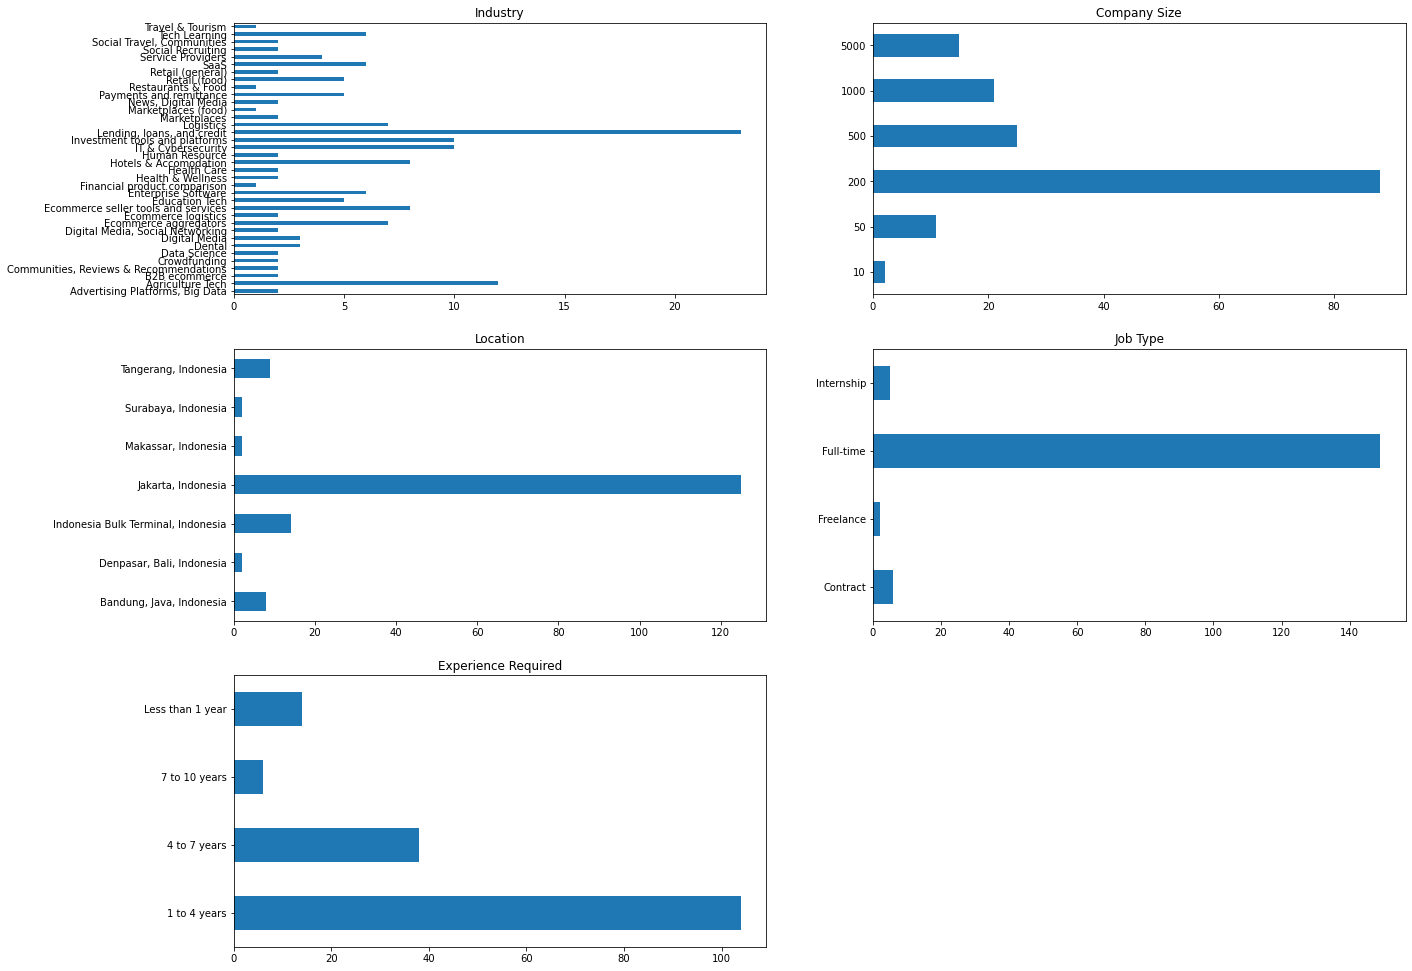

In [69]:
ctg_cols = ['Industry', 'Company Size', 'Location',
            'Job Type', 'Experience Required']

fig, ax = plt.subplots(3,2, figsize=(21,17))
ax.flatten()[-1].remove()

for ix, col in enumerate(ctg_cols):
    curr_ax = ax.flatten()[ix]
    df_jobs_da[col].value_counts().sort_index().plot(kind='barh', ax=curr_ax)
    curr_ax.set_title(col)

plt.show()

In [24]:
print('Total data-related job posts: {}'.format(df_jobs_da.shape[0]))

Total data-related job posts: 162


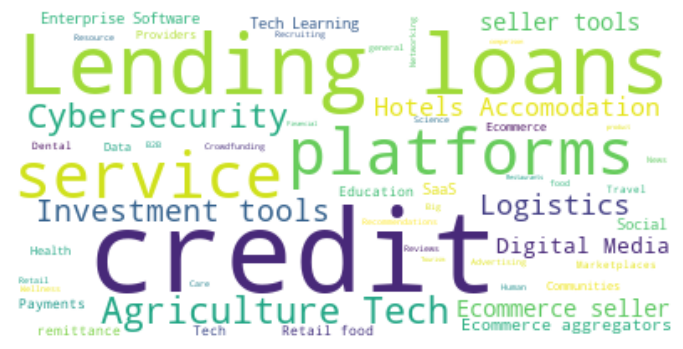

In [86]:
industries_all = ' '.join(df_jobs_da['Industry'].values.tolist())
wordcloud = WordCloud(background_color='white').generate(industries_all)
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

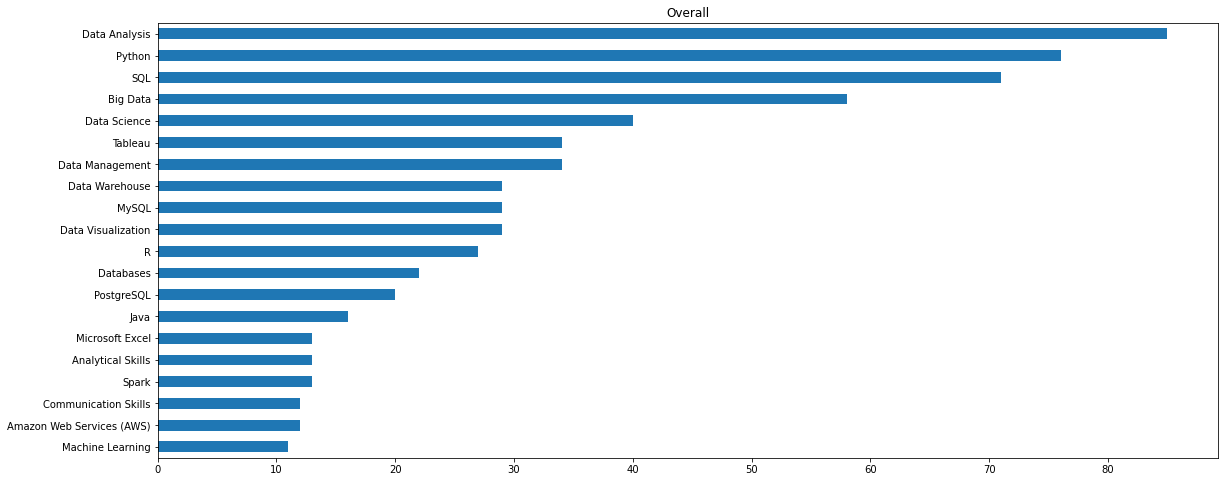

In [25]:
skill_required_lists = df_jobs_da['Skills Required'].apply(lambda x: ast.literal_eval(x)).values.tolist()
skill_required_all = np.array([skill for skill_list in skill_required_lists for skill in skill_list])
skill_count = np.unique(skill_required_all, return_counts=True)

plt.figure(figsize=(19,8))
pd.Series(index=skill_count[0], data=skill_count[1]).sort_values()[-20:].plot(kind='barh')
plt.title('Overall')
plt.show()

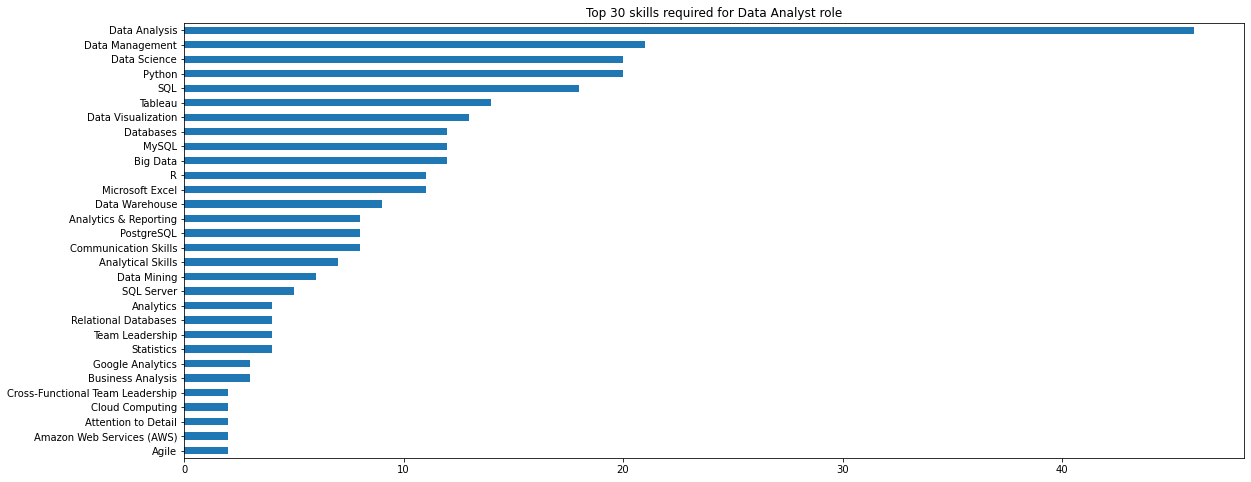

In [91]:
def show_top_required_skills(top_n=30, role='Data Analyst'):
    skill_required_lists = df_jobs_da[df_jobs_da['Role'] == role]['Skills Required'].apply(
        lambda x: ast.literal_eval(x)).values.tolist()
    skill_required_all = np.array([skill for skill_list in skill_required_lists for skill in skill_list])
    skill_count = np.unique(skill_required_all, return_counts=True)

    plt.figure(figsize=(19,8))
    pd.Series(index=skill_count[0], data=skill_count[1]).sort_values()[-top_n:].plot(kind='barh')
    plt.title('Top {} skills required for {} role'.format(top_n, role))
    plt.show()
    
show_top_required_skills()

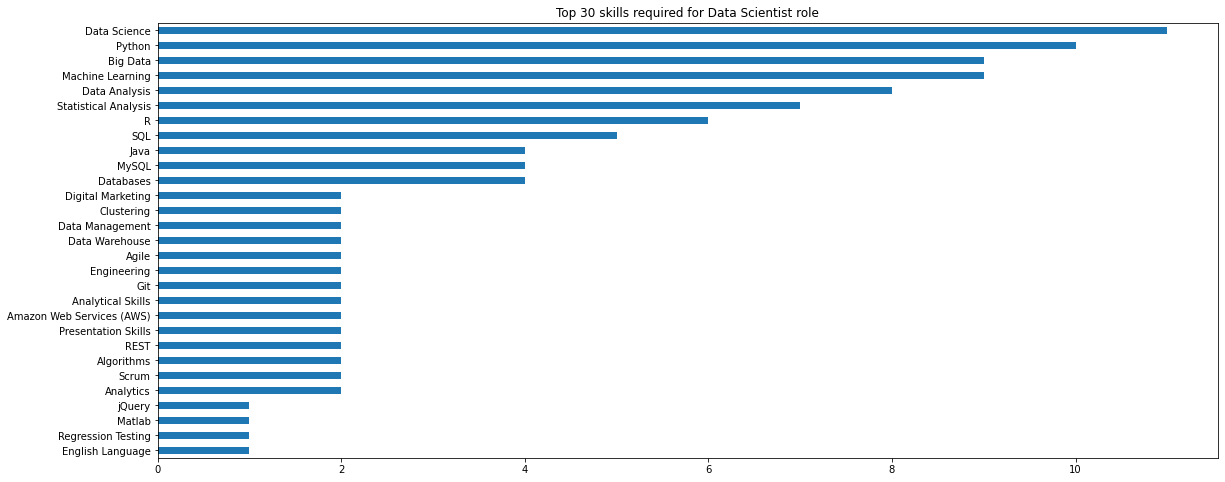

In [92]:
show_top_required_skills(role='Data Scientist')

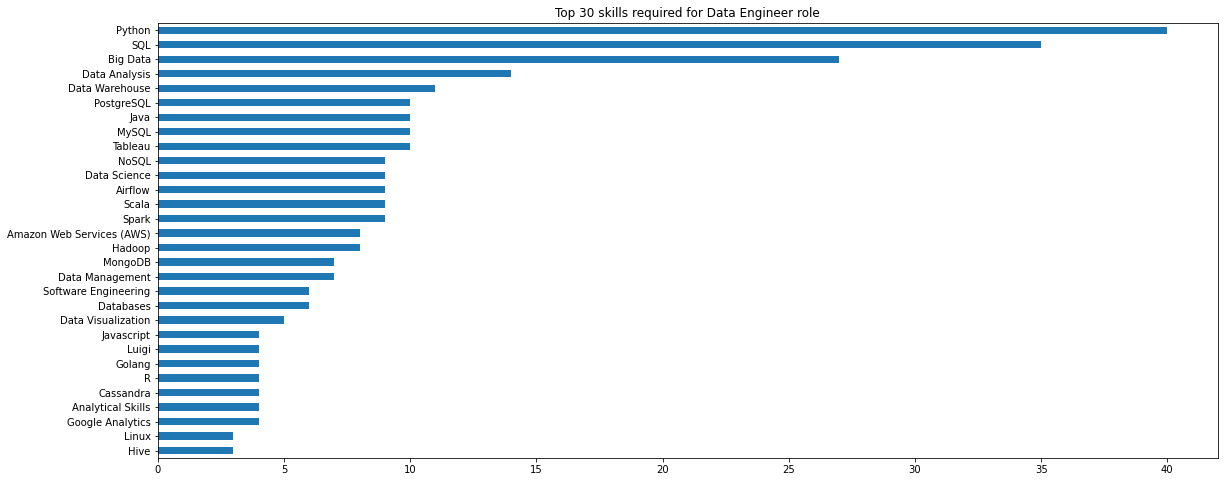

In [93]:
show_top_required_skills(role='Data Engineer')

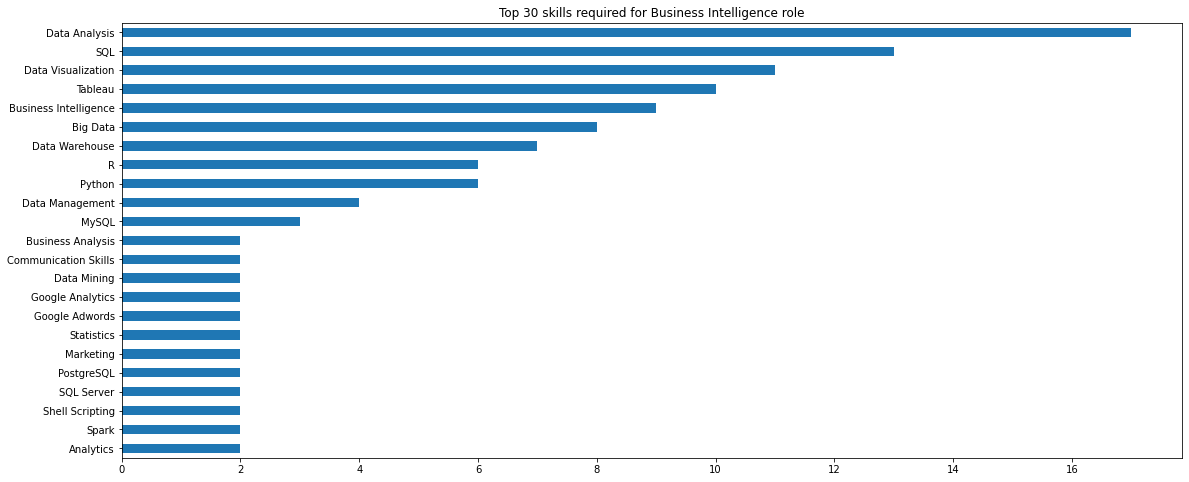

In [94]:
show_top_required_skills(role='Business Intelligence')

In [95]:
df_jobs_da['Senior/Manager Role'] = df_jobs_da.loc[:, 'Title'].apply(
    lambda x: 1 if re.match('^.*(Sr.|Senior|Lead|Manager|Head).*', x) else 0
)
df_jobs_da['Senior/Manager Role'].value_counts()

/var/folders/0s/2ngs3p4j0dn7m5nk3w1gcrs40000gn/T/ipykernel_88725/899110011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs_da['Senior/Manager Role'] = df_jobs_da.loc[:, 'Title'].apply(


0    117
1     45
Name: Senior/Manager Role, dtype: int64

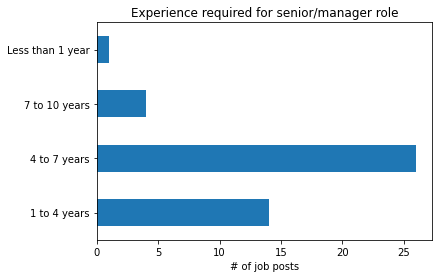

In [96]:
df_jobs_da[df_jobs_da['Senior/Manager Role'] == 1]['Experience Required'].value_counts(
).sort_index().plot(kind='barh')
plt.title('Experience required for senior/manager role')
plt.xlabel('# of job posts')
plt.show()

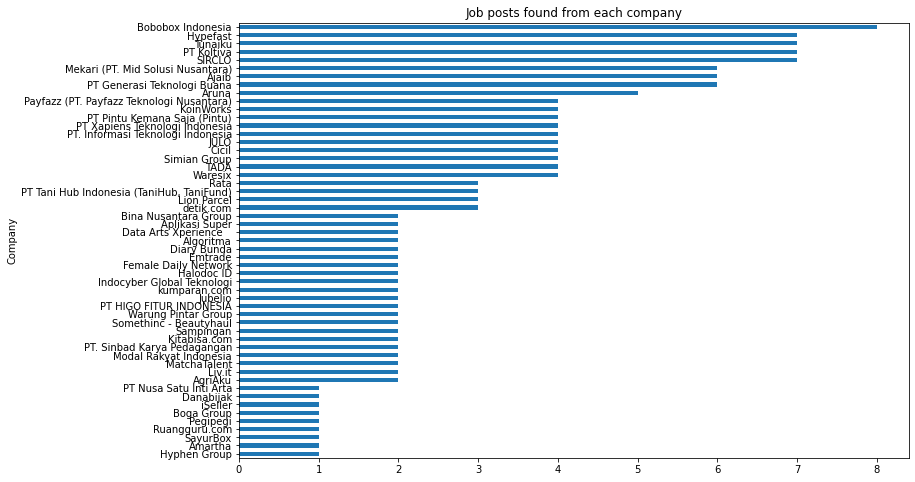

In [97]:
plt.figure(figsize=(12,8))
df_jobs_da.groupby('Company')['Role'].count().sort_values().plot(kind='barh')
plt.title('Job posts found from each company')
plt.show()

In [42]:
df_jobs_da[df_jobs_da['Skills Required'].apply(lambda x: 'Python' in x) == True][
    ['Role', 'Company', 'Experience Required', 'Skills Required']
].drop_duplicates()

,Role,Company,Experience Required,Skills Required
0,Data Analyst,Cicil,1 to 4 years,"['Python', 'SQL', 'R']"
3,Data Analyst,Diary Bunda,1 to 4 years,"['MySQL', 'Python', 'Business Analysis', 'Data..."
4,Data Analyst,Bobobox Indonesia,1 to 4 years,"['Data Analysis', 'Microsoft Excel', 'Python',..."
6,Data Analyst,detik.com,1 to 4 years,"['Data Visualization', 'Python', 'Product Mana..."
8,Data Analyst,Tunaiku,1 to 4 years,"['Data Visualization', 'Python', 'SQL', 'R', '..."
9,Data Analyst,"PT Tani Hub Indonesia (TaniHub, TaniFund)",4 to 7 years,"['Amazon Web Services (AWS)', 'MySQL', 'Postgr..."
11,Data Analyst,PT Xapiens Teknologi Indonesia,1 to 4 years,"['Python', 'R', 'Tableau', 'Data Analysis', 'D..."
12,Data Analyst,Pegipegi,Less than 1 year,"['Data Analysis', 'SQL', 'Tableau', 'Python']"
38,Business Intelligence,Aplikasi Super,1 to 4 years,"['Statistics', 'Data Visualization', 'Python',..."
47,Data Scientist,kumparan.com,1 to 4 years,"['Python', 'Machine Learning', 'SQL']"
